In [7]:
from pathlib import Path
import pandas as pd
import plotly.express as px
import json

# Paths
cwd = Path.cwd()
data_folder = cwd.parent / "results"
file_path = data_folder / "ECWByRegion.csv"

# Load your data
df = pd.read_csv(file_path)

# Load UN regions GeoJSON (replace with correct path/url to file)
with open("un_regions.geojson", "r") as f:
    regions_geojson = json.load(f)

# First map: ECW ILO
fig1 = px.choropleth(
    df,
    geojson=regions_geojson,
    locations="Region",        # must match GeoJSON property
    featureidkey="properties.region",  # property inside geojson features
    color="ECW ILO",
    color_continuous_scale="Viridis",
    title="ECW ILO by UN Region"
)

fig1.update_geos(fitbounds="locations", visible=False)

# Second map: ECW Poll
fig2 = px.choropleth(
    df,
    geojson=regions_geojson,
    locations="Region",
    featureidkey="properties.region",
    color="ECW Poll",
    color_continuous_scale="Plasma",
    title="ECW Poll by UN Region"
)

fig2.update_geos(fitbounds="locations", visible=False)

fig1.show()
fig2.show()


FileNotFoundError: [Errno 2] No such file or directory: 'un_regions.geojson'

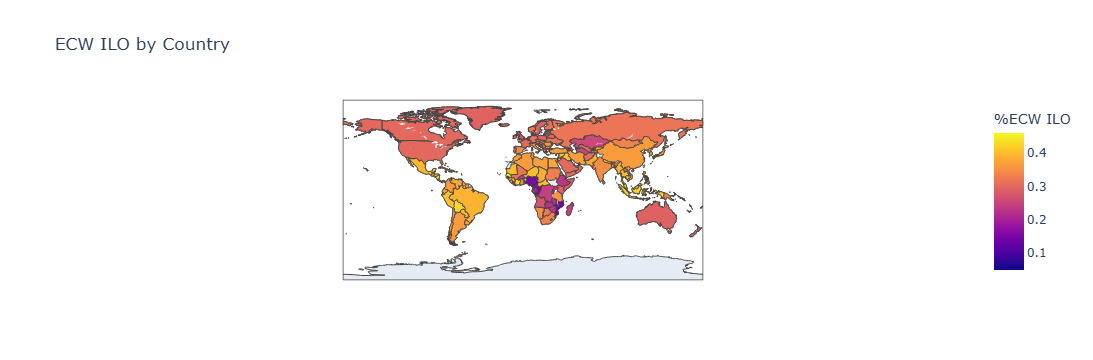

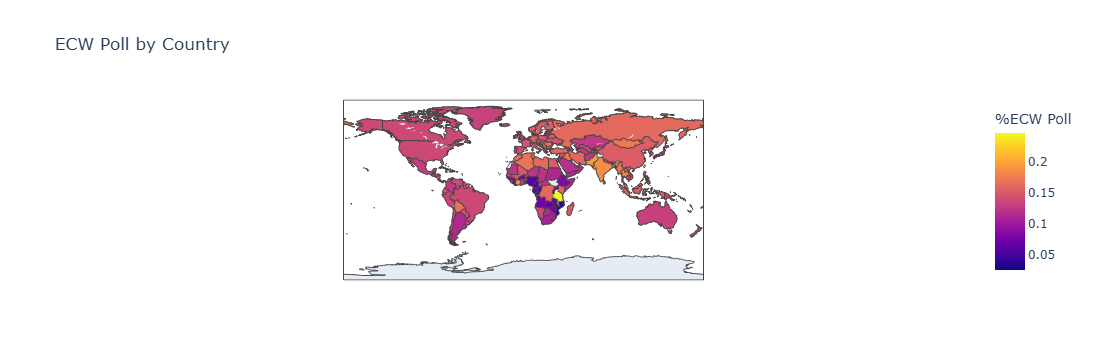

✅ Saved as ECW_ILO_map.html and ECW_Poll_map.html


In [10]:
import pandas as pd
import plotly.express as px
from pathlib import Path

file_path = data_folder / "ECWByCountry.csv"

# Load your data
df = pd.read_csv(file_path)

# First map: ECW ILO
fig1 = px.choropleth(
    df,
    locations="Country Code",
    locationmode="ISO-3",
    color="%ECW ILO",
    hover_name="Country Code",
    color_continuous_scale="Plasma",
    title="ECW ILO by Country"
)

# Show and save
fig1.show()
fig1.write_html("ECW_ILO_map.html")

# Second map: ECW Poll
fig2 = px.choropleth(
    df,
    locations="Country Code",
    locationmode="ISO-3",
    color="%ECW Poll",
    hover_name="Country Code",
    color_continuous_scale="Plasma",
    title="ECW Poll by Country"
)

# Show and save
fig2.show()
fig2.write_html("ECW_Poll_map.html")

